<a href="https://colab.research.google.com/github/ahsanul-islam/Audi_used_car_analysis/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data sets

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Data sets/EMK_WORKSHOP/audi.csv')
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


## Information about the dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB
None


## Insights about the data

From the dataset it is observed that there are 8 columns. There are 4 categorical data.These are 'model', 'year', 'transmission', 'fuelType'. The other ones are numerical data. So there can be 4 barplot each for the categorical data.

## Function for counting unique values

In [4]:
def Unique_value_counts(data,col_names):
  dic = dict()
  for j in col_names:
    dic[j]=list()
  for i in col_names:
    dic[i].append(len(data[i].unique()))
  return dic
u_v = Unique_value_counts(df,['model','year','transmission','fuelType'])

## Data Frame of Unique Values

In [5]:
unique_values_dataframe=pd.DataFrame.from_dict(u_v,orient='columns')
display(unique_values_dataframe)

,model,year,transmission,fuelType
0,26,21,3,3


## Function for value counting for each category

In [6]:
def value_counts_in_percentage(df,col_name):
  count_val = pd.DataFrame(df[col_name].value_counts())
  count_val=count_val.reset_index()
  count_val=count_val.rename(columns={'index': col_name,col_name:'Percentage (%) of Cars'})
  count_val['Percentage (%) of Cars']=np.round(count_val['Percentage (%) of Cars']/count_val['Percentage (%) of Cars'].sum(),4)*100
  return count_val

## Function for Barplot

In [7]:
def bar_plot(data,color,y_ticks):
  columns = list(data.columns)
  if len(data)>10:
    rotate = 90
  else:
    rotate = 0

  sns.barplot(x = columns[0],y=columns[1],data=data,color=color,alpha=1)
  plt.title('Percentage (%) of Present Cars for each {}'.format(columns[0].title()))
  plt.xticks(rotation=rotate)
  plt.yticks(y_ticks)
  plt.xlabel(columns[0].title())
  plt.ylabel('Percentage (%) of Cars ')
  


## Barplots Show

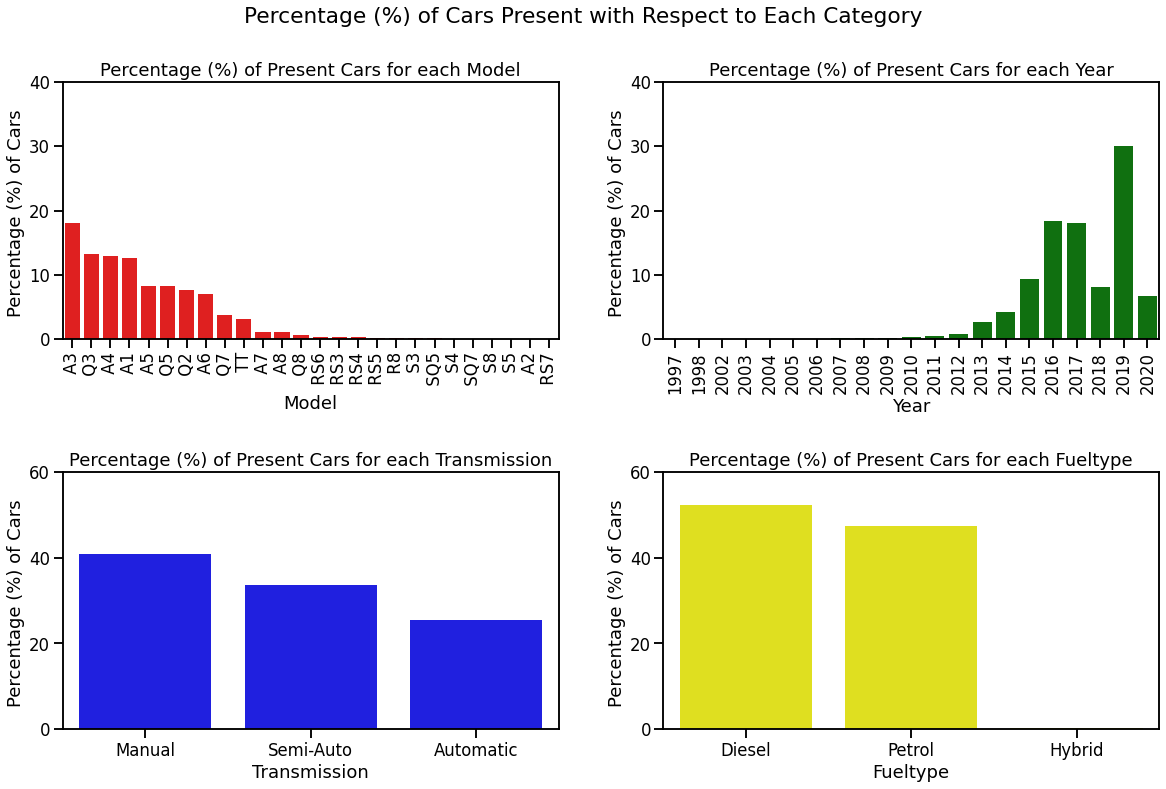

In [8]:
sns.set_context('talk')
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
bar_plot(value_counts_in_percentage(df,'model'),'red',np.arange(0,41,10))
plt.subplot(2,2,2)
bar_plot(value_counts_in_percentage(df,'year'),'green',np.arange(0,41,10))
plt.subplot(2,2,3)
bar_plot(value_counts_in_percentage(df,'transmission'),'blue',np.arange(0,61,20))
plt.subplot(2,2,4)
bar_plot(value_counts_in_percentage(df,'fuelType'),'yellow',np.arange(0,61,20))
plt.suptitle('Percentage (%) of Cars Present with Respect to Each Category')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)
plt.show()

# Scatterplots without hue parameter

There will be 3 scatterplot

1. Scatterplot of car price vs milage
2. Scatterplot of car price vs mpg (miles per gallon)
3. Scatterplot of car price vs engine size


The purpose of these three plots is to observe how different features of cars ar related to their price and to have a rough estimation of their correlation.


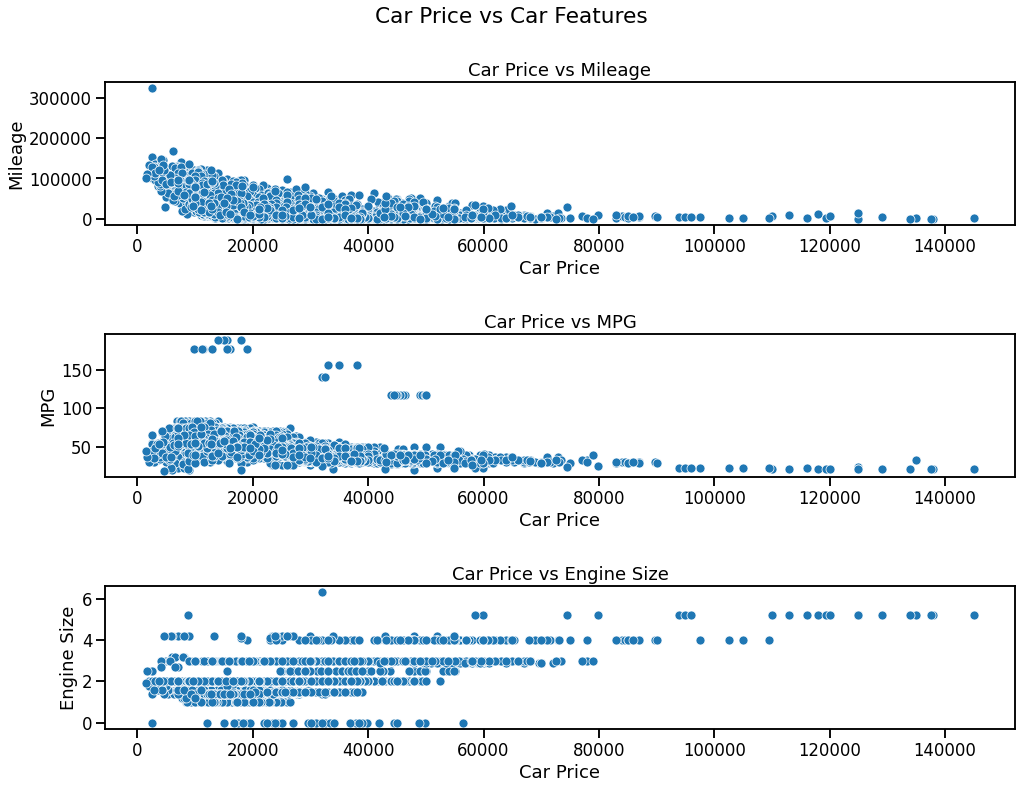

In [9]:
plt.figure(figsize=(16,12))
sns.set_context('talk')


plt.subplot(3,1,1)
sns.scatterplot(x='price',y='mileage',data=df)
plt.xlabel('Car Price')
plt.ylabel('Mileage')
plt.title('Car Price vs Mileage')


plt.subplot(3,1,2)
sns.scatterplot(x='price',y='mpg',data=df)
plt.xlabel('Car Price')
plt.ylabel('MPG')
plt.title('Car Price vs MPG')


plt.subplot(3,1,3)
sns.scatterplot(x='price',y='engineSize',data=df)
plt.xlabel('Car Price')
plt.ylabel('Engine Size')
plt.title('Car Price vs Engine Size')

plt.suptitle('Car Price vs Car Features')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)


# Observations from the scatterplots

## Scatterplot 1 (Car price vs Mileage)
It is observed from the plot that roughly there is an inverse relationship between the car price and mileage. As the car price increases the mileage decreases.

## Scatterplot 2 (Car price vs MPG)
Here it is seen that for higher MPG the price seems to be less than the MPG’s for the lower price. It can be said that there is an inverse relationship between MPG and car price. Although the relationship is not as strong as the first one mentioned above.

## Scatterplot 3 (Car price vs Engine Size)
There can hardly be any relationship estimated from the figure. One thing is hardly observed that the Engine-size with higher values tends to have a higher price.


## Scatterplots with roughly fitted curves

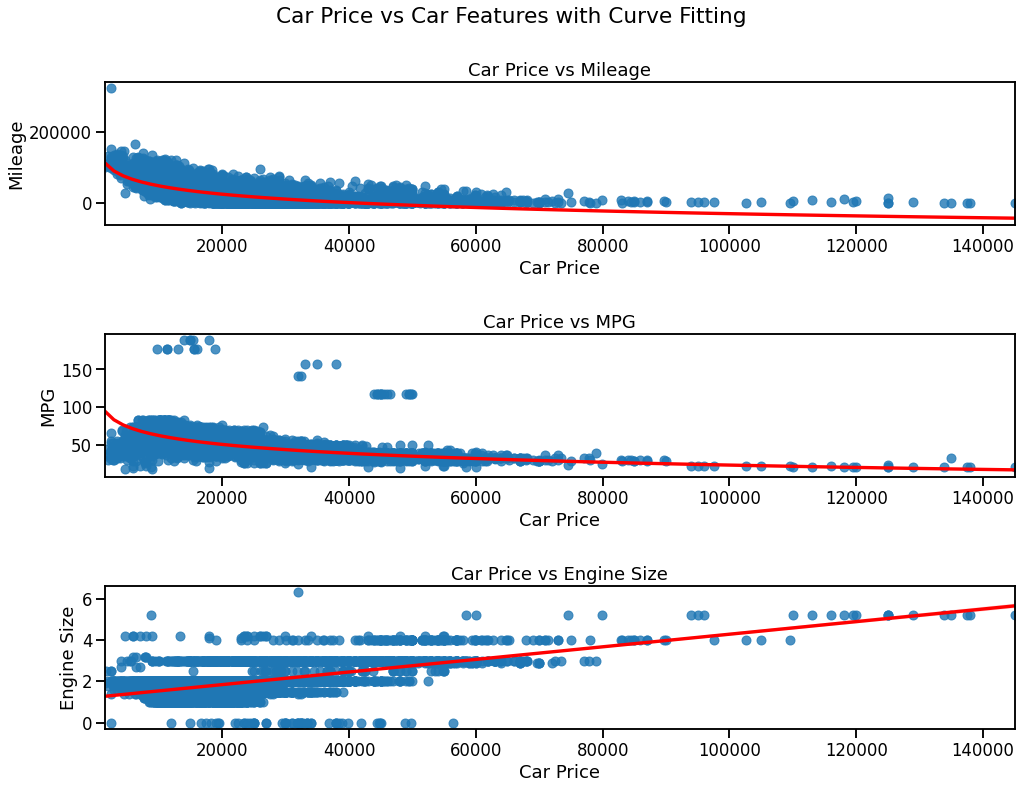

In [10]:
plt.figure(figsize=(16,12))
sns.set_context('talk')

## Fit with logarithmic regression
plt.subplot(3,1,1)
sns.regplot(x='price',y='mileage',data=df,line_kws={'color':'r'},logx=1)
plt.xlabel('Car Price')
plt.ylabel('Mileage')
plt.title('Car Price vs Mileage')

## Fit with logarithmic regression
plt.subplot(3,1,2)
sns.regplot(x='price',y='mpg',data=df,line_kws={'color':'r'},logx=1)
plt.xlabel('Car Price')
plt.ylabel('MPG')
plt.title('Car Price vs MPG')

## Fit with linear regression
plt.subplot(3,1,3)
sns.regplot(x='price',y='engineSize',data=df,line_kws={'color':'r'},order=1)
plt.xlabel('Car Price')
plt.ylabel('Engine Size')
plt.title('Car Price vs Engine Size')

plt.suptitle('Car Price vs Car Features with Curve Fitting')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)

# Observations from the scatterplots with curve fitting

## Scatterplot 1 (Car price vs Mileage)
It is observed from the plot that roughly there is an inverse relationship between the car price and mileage. As the car price increases the mileage decreases. The logarithmic regression seems to have good fit for compared to others.

## Scatterplot 2 (Car price vs MPG)
Here it is seen that for higher MPG the price seems to be less than the MPG’s for the lower price. It can be said that there is an inverse relationship between MPG and car price. Although the relationship is not as strong as the first one mentioned above. The logarithmic regression seems to have good fit for compared to others.

## Scatterplot 3 (Car price vs Engine Size)
There can hardly be any relationship estimated from the figure. One thing is hardly observed that the Engine-size with higher values tends to have a higher price. The linear regression seems to have good fit for compared to others.

# Scatterplots with hue parameter

There will be 3 scatterplot

1. Scatterplot of car price vs milage
2. Scatterplot of car price vs mpg (miles per gallon)
3. Scatterplot of car price vs engine size


The purpose of these three plots is to observe how different features of cars ar related to their price and to have a rough estimation of their correlation. The observation is also done categerocally for transmission and fuel type.

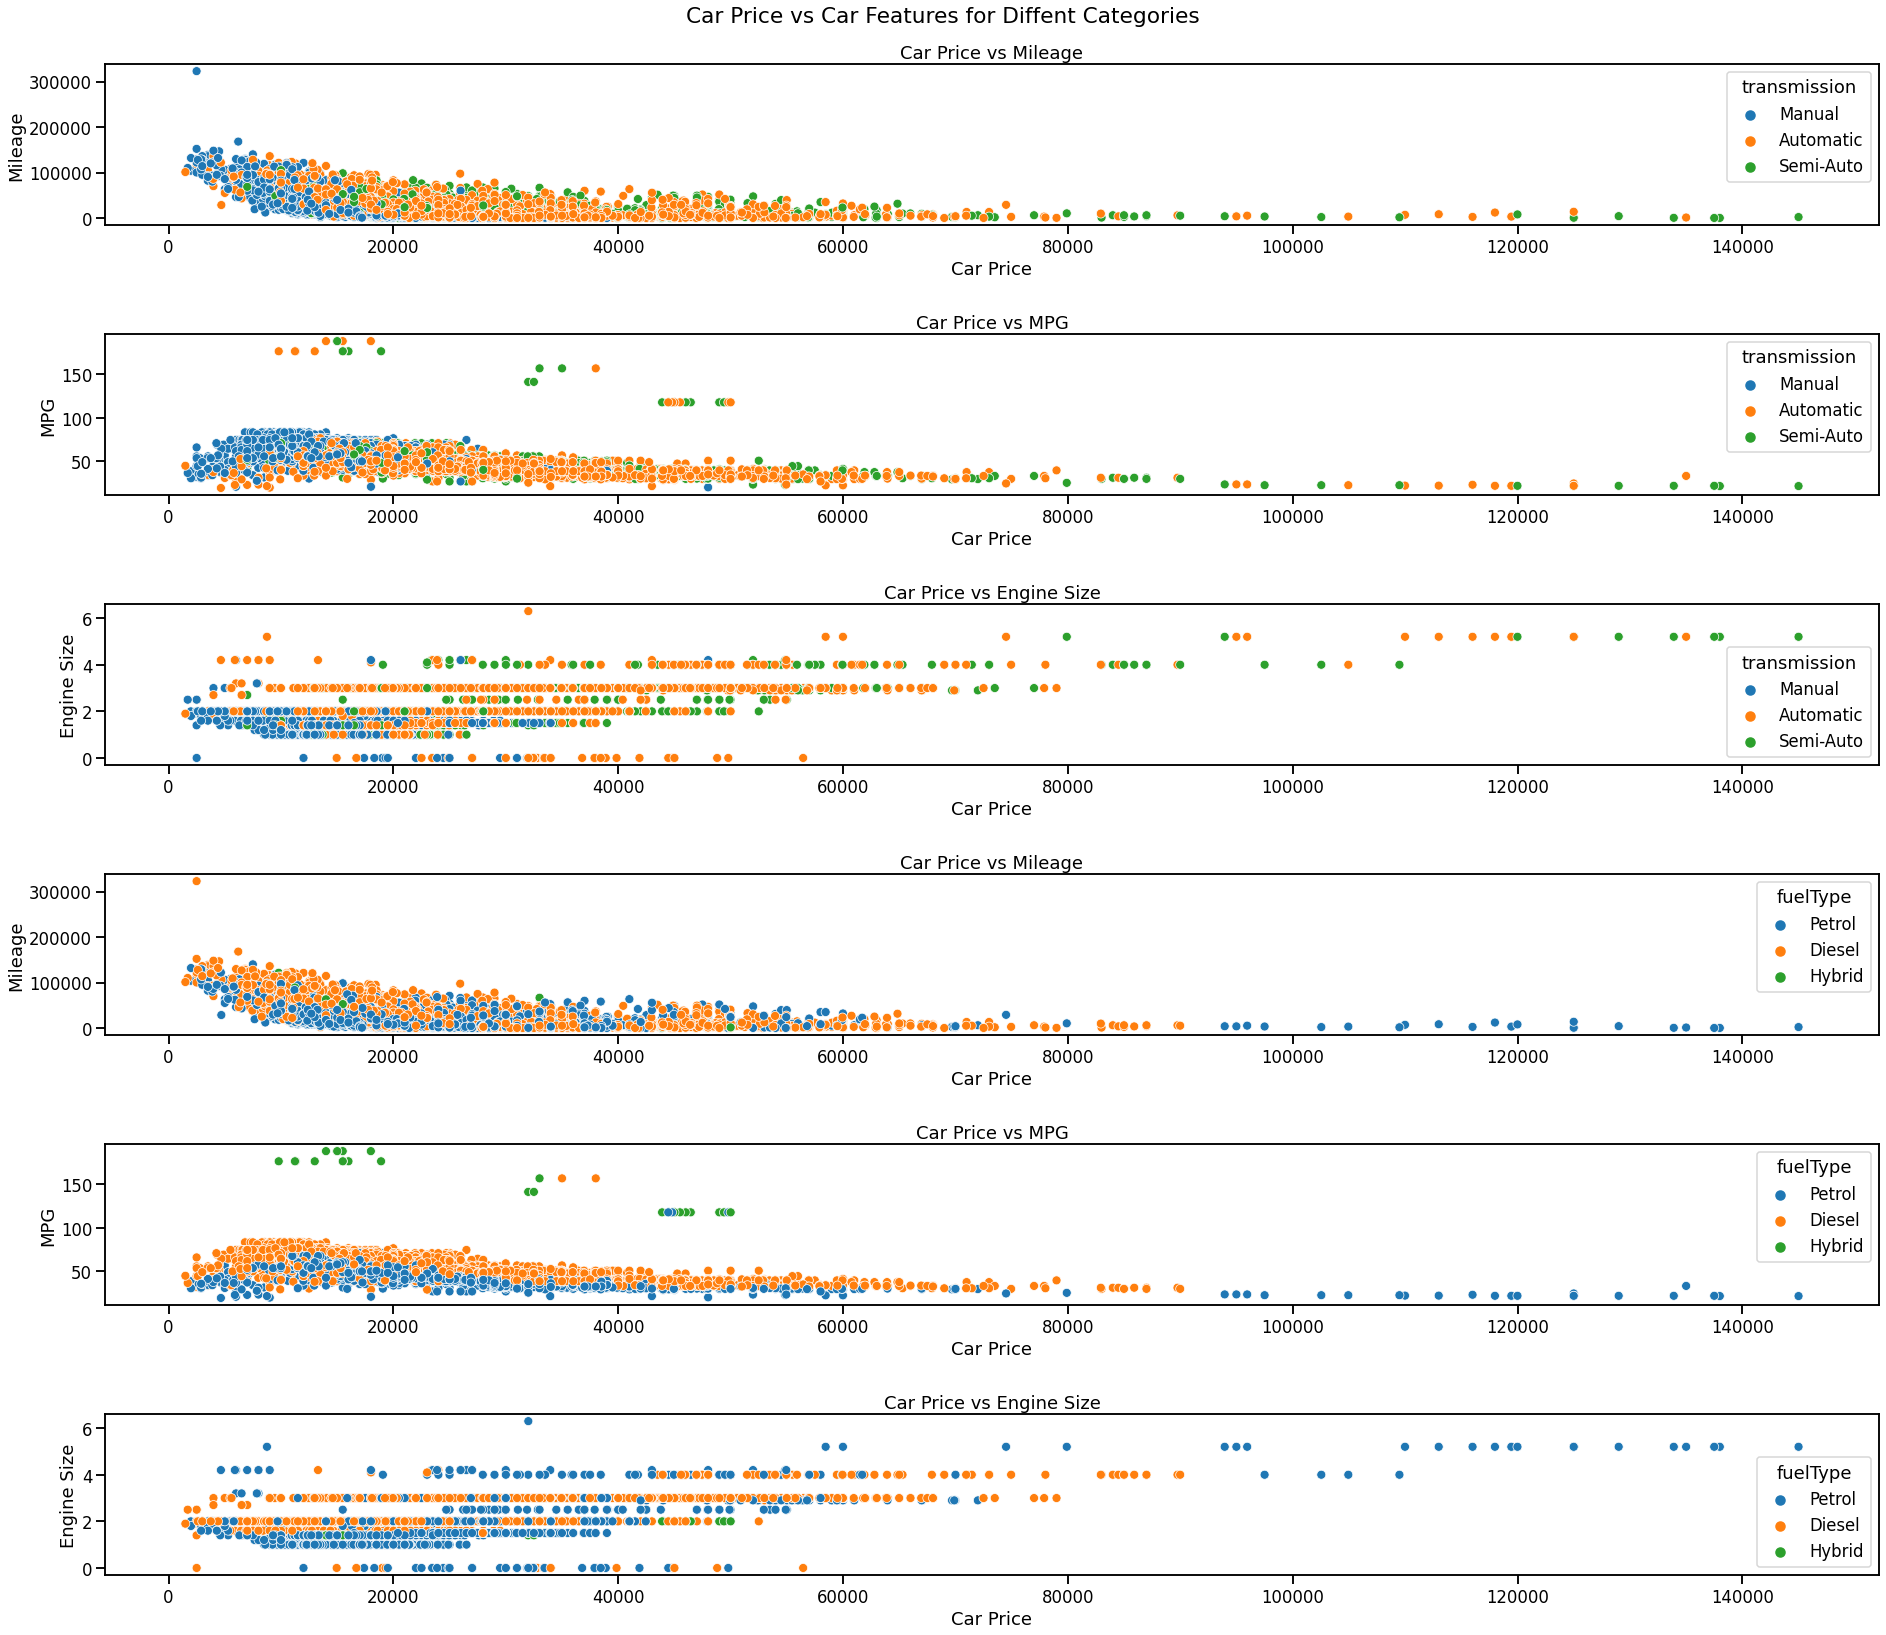

In [11]:
plt.figure(figsize=(28,24))
sns.set_context('talk')

##----------------------- For Transmission Categories---------------------------
plt.subplot(6,1,1)
sns.scatterplot(x='price',y='mileage',data=df,hue='transmission')
plt.xlabel('Car Price')
plt.ylabel('Mileage')
plt.title('Car Price vs Mileage')


plt.subplot(6,1,2)
sns.scatterplot(x='price',y='mpg',data=df,hue='transmission')
plt.xlabel('Car Price')
plt.ylabel('MPG')
plt.title('Car Price vs MPG')


plt.subplot(6,1,3)
sns.scatterplot(x='price',y='engineSize',data=df,hue='transmission')
plt.xlabel('Car Price')
plt.ylabel('Engine Size')
plt.title('Car Price vs Engine Size')

##----------------------- For Fuel Type Categories---------------------------

plt.subplot(6,1,4)
sns.scatterplot(x='price',y='mileage',data=df,hue='fuelType')
plt.xlabel('Car Price')
plt.ylabel('Mileage')
plt.title('Car Price vs Mileage')


plt.subplot(6,1,5)
sns.scatterplot(x='price',y='mpg',data=df,hue='fuelType')
plt.xlabel('Car Price')
plt.ylabel('MPG')
plt.title('Car Price vs MPG')


plt.subplot(6,1,6)
sns.scatterplot(x='price',y='engineSize',data=df,hue='fuelType')
plt.xlabel('Car Price')
plt.ylabel('Engine Size')
plt.title('Car Price vs Engine Size')



plt.suptitle('Car Price vs Car Features for Diffent Categories')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)

# Observations from the scatterplots with hue

For all the categories, it seems to have the same sort of properties as discussed above. One thing to be noted is that the transmission type of manual and automatic seems to dominate in numbers. Similarly, petrol and diesel are dominating in the case of fuel type category.



# Histogram

There will be histogram for 4 types as there are 4 columns that contain numerical data
1. Price
2. Mileage
3. MPG
4. Engine size


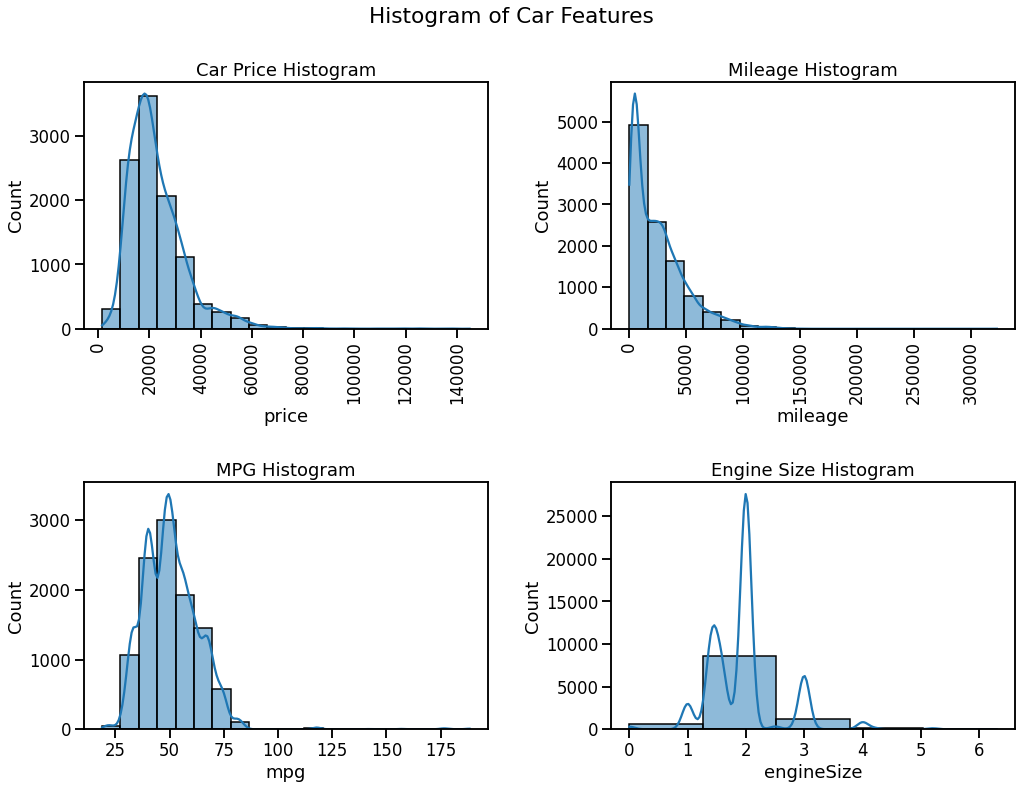

In [12]:
plt.figure(figsize=(16,12))
sns.set_context('talk')


plt.subplot(2,2,1)
sns.histplot(x='price',data=df,kde=1,bins=20)
plt.xticks(rotation = 90)
plt.title('Car Price Histogram')


plt.subplot(2,2,2)
sns.histplot(x='mileage',data=df,kde=1,bins=20,)
plt.xticks(rotation = 90)
plt.title('Mileage Histogram')



plt.subplot(2,2,3)
sns.histplot(x='mpg',data=df,kde=1,bins=20)
plt.title('MPG Histogram')

plt.subplot(2,2,4)
sns.histplot(x='engineSize',data=df,kde=1,bins=5)
plt.title('Engine Size Histogram')


plt.suptitle('Histogram of Car Features')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)


## Observations from the Histogram
Car Price Histogram   : The distribution is positively skewed.


Mileage Histogram      : The distribution is strongly skewed positively.


MPG     Histogram        : It is close to normal distribution.

Engine Size Histogram   : It is weakly close to normal distribution.

# ECDF

There will be ECDF plot for 4 types as there are 4 columns that contain numerical data
1. Price
2. Mileage
3. MPG
4. Engine size

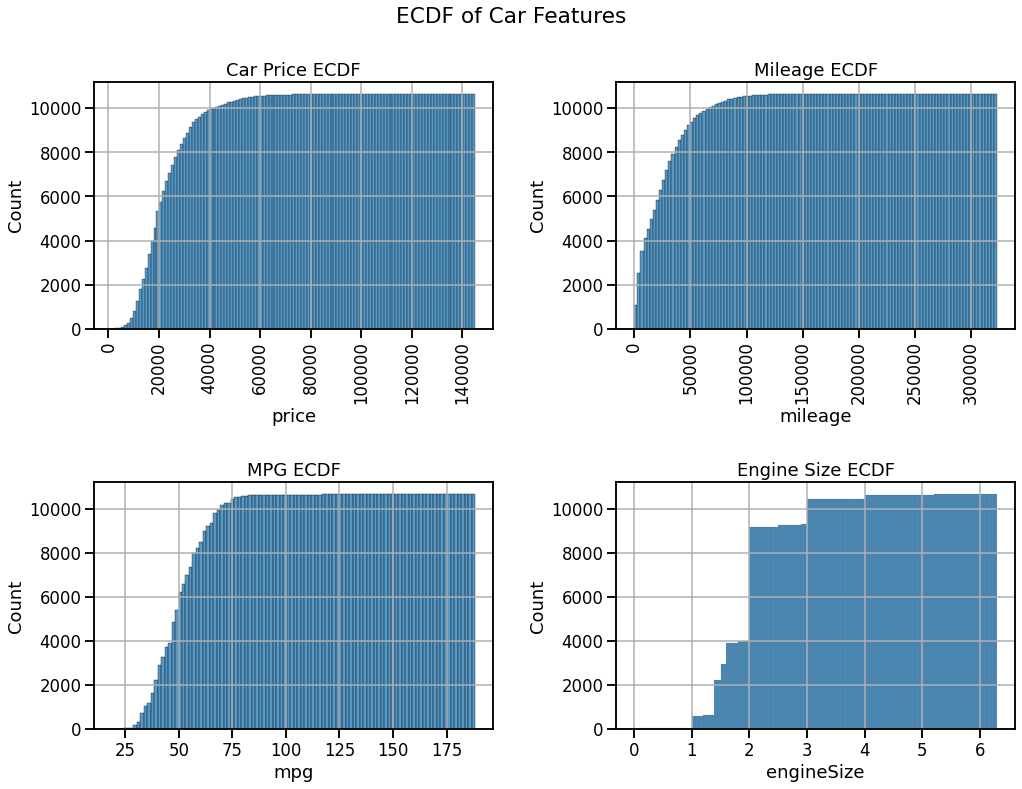

In [13]:
plt.figure(figsize=(16,12))
sns.set_context('talk')


plt.subplot(2,2,1)
sns.histplot(x='price',data=df,cumulative=1)
plt.xticks(rotation = 90)
plt.title('Car Price ECDF')
plt.grid()


plt.subplot(2,2,2)
sns.histplot(x='mileage',data=df,cumulative=1)
plt.xticks(rotation = 90)
plt.title('Mileage ECDF')
plt.grid()



plt.subplot(2,2,3)
sns.histplot(x='mpg',data=df,cumulative=1)
plt.title('MPG ECDF')
plt.grid()



plt.subplot(2,2,4)
sns.histplot(x='engineSize',data=df,binwidth=0.01,cumulative=1)
plt.title('Engine Size ECDF')
plt.grid()

plt.suptitle('ECDF of Car Features')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)


## Observations from the ECDF
Car Price ECDF   : High Number of Car's price is below 4000.


Mileage ECDF    : High Number of Car's mileage is below 5000.


MPG     ECDF    : High Number of Car's mpg is below 75.

Engine Size ECDF: High Number of Car's engine size is below 3.